## Introduction
CIFAR-10 is a dataset of 50,000 32x32 colored training images and 10,000 test images, labeled with 10 categories. It's a basic image classification problem.

In [1]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
     ------------------------------------- 272.8/272.8 MB 11.7 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ------------------------------------- 420.6/420.6 kB 13.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 39.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------- 440.7/440.7 kB 28.7 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 71.2 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [2]:
#pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
#import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


In [5]:
#load dataset
ROOT_PATH='C:/Users/Harish/Downloads/cifar-10-python/'  # Modify this line with the path to the folder where folder "cifar-10-batches-py" locate

In [6]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
batch1 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_1")
batch2 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_2")
batch3 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_3")
batch4 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_4")
batch5 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_5")
test_batch = unpickle(ROOT_PATH+"cifar-10-batches-py/test_batch")

In [8]:
def load_data0(btch):
    labels = btch[b'labels']
    imgs = btch[b'data'].reshape((-1, 32, 32, 3))
    
    res = []
    for ii in range(imgs.shape[0]):
        img = imgs[ii].copy()
        img = np.fliplr(np.rot90(np.transpose(img.flatten().reshape(3,32,32)), k=-1))
        res.append(img)
    imgs = np.stack(res)
    return labels, imgs


In [9]:
#loading data along with train test split
def load_data():
    x_train_l = []
    y_train_l = []
    for ibatch in [batch1, batch2, batch3, batch4, batch5]:
        labels, imgs = load_data0(ibatch)
        x_train_l.append(imgs)
        y_train_l.extend(labels)
    x_train = np.vstack(x_train_l)
    y_train = np.vstack(y_train_l)
    
    x_test_l = []
    y_test_l = []
    labels, imgs = load_data0(test_batch)
    x_test_l.append(imgs)
    y_test_l.extend(labels)
    x_test = np.vstack(x_test_l)
    y_test = np.vstack(y_test_l)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
del batch1, batch2, batch3, batch4, batch5, test_batch

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [10]:
# Pixel reduction
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the labels
y_train, y_test = y_train.flatten(), y_test.flatten()


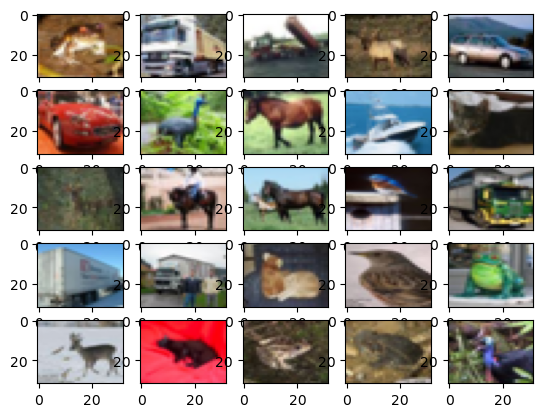

In [11]:
# visualize data through 5*5 grid
fig, ax = plt.subplots(5, 5)
var = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		var += 1

plt.show()


## Deep Neural Network with CNN

In [12]:
# number of classes
classes = len(set(y_train))

# calculate total number of classes for output layer
print("number of classes:", classes)

# Build the model using the convolution model functional API input layer
i = Input(shape=m_train[0].shape)
m = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
m = BatchNormalization()(m)
m = Conv2D(32, (3, 3), activation='relu', padding='same')(m)
m = BatchNormalization()(m)
m = MaxPooling2D((2, 2))(m)

m = Conv2D(64, (3, 3), activation='relu', padding='same')(m)
m = BatchNormalization()(m)
m = Conv2D(64, (3, 3), activation='relu', padding='same')(m)
m = BatchNormalization()(m)
m = MaxPooling2D((2, 2))(m)

m = Conv2D(128, (3, 3), activation='relu', padding='same')(m)
m = BatchNormalization()(m)
m = Conv2D(128, (3, 3), activation='relu', padding='same')(m)
m = BatchNormalization()(m)
m = MaxPooling2D((2, 2))(m)

m = Flatten()(m)
m = Dropout(0.2)(m)

# Hidden layer
m = Dense(1024, activation='relu')(m)
m = Dropout(0.2)(m)

# last hidden layer i.e.. output layer
m = Dense(K, activation='softmax')(m)

model = Model(i, m)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16


The Convolution network consists of several layers that perform different operations on the input image. The first layer is the Input layer, which has a size of 32*32 and 3 channels. The next layer is the **Convolution layer**, which applies a filter to the image using 2D convolution. The output of the Convolution layer is obtained by computing the dot product between the filter and the image. 

        After the Convolution layer, the **Batch Normalization layer** is used to normalize the input of a layer by scaling and adjusting the activations. This is done to improve the training speed and stability by reducing the effect of internal covariate shift.  

        The **Max pooling layer** is then used to extract important features from the output of the Batch Normalization layer. It reduces the size of the feature maps while retaining essential information. These layers are repeated three times to create intermediate layers in the neural network.
        These functions are repeated 3 times indicating intermediate layers in the neural network.



In [13]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [14]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=33)


Epoch 1/33
1563/1563 [==============================] - 280s 178ms/step - loss: 1.2801 - accuracy: 0.5599 - val_loss: 0.9467 - val_accuracy: 0.6650
Epoch 2/33
1563/1563 [==============================] - 224s 143ms/step - loss: 0.8341 - accuracy: 0.7100 - val_loss: 0.9256 - val_accuracy: 0.6768
Epoch 3/33
1563/1563 [==============================] - 277s 178ms/step - loss: 0.6901 - accuracy: 0.7614 - val_loss: 0.7721 - val_accuracy: 0.7335
Epoch 4/33
1563/1563 [==============================] - 213s 136ms/step - loss: 0.5884 - accuracy: 0.7969 - val_loss: 0.7621 - val_accuracy: 0.7487
Epoch 5/33
1563/1563 [==============================] - 221s 141ms/step - loss: 0.5041 - accuracy: 0.8265 - val_loss: 0.6531 - val_accuracy: 0.7908
Epoch 6/33
1563/1563 [==============================] - 218s 139ms/step - loss: 0.4244 - accuracy: 0.8534 - val_loss: 0.6697 - val_accuracy: 0.7895
Epoch 7/33
1563/1563 [==============================] - 229s 147ms/step - loss: 0.3654 - accuracy: 0.8745 - val_

In [15]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

mod = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=50)


Epoch 1/50
1562/1562 [==============================] - 208s 133ms/step - loss: 0.5560 - accuracy: 0.8235 - val_loss: 0.4947 - val_accuracy: 0.8372
Epoch 2/50
1562/1562 [==============================] - 205s 131ms/step - loss: 0.4445 - accuracy: 0.8533 - val_loss: 0.4485 - val_accuracy: 0.8529
Epoch 3/50
1562/1562 [==============================] - 206s 132ms/step - loss: 0.4118 - accuracy: 0.8627 - val_loss: 0.4600 - val_accuracy: 0.8484
Epoch 4/50
1562/1562 [==============================] - 207s 132ms/step - loss: 0.3871 - accuracy: 0.8705 - val_loss: 0.4218 - val_accuracy: 0.8609
Epoch 5/50
1562/1562 [==============================] - 204s 131ms/step - loss: 0.3680 - accuracy: 0.8770 - val_loss: 0.4438 - val_accuracy: 0.8537
Epoch 6/50
1562/1562 [==============================] - 206s 132ms/step - loss: 0.3543 - accuracy: 0.8794 - val_loss: 0.4727 - val_accuracy: 0.8484
Epoch 7/50
1562/1562 [==============================] - 205s 131ms/step - loss: 0.3409 - accuracy: 0.8860 - val_

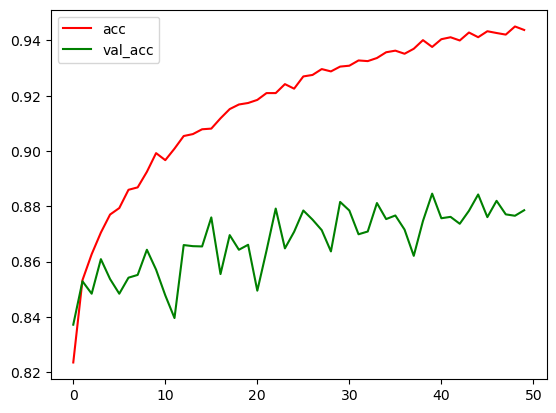

In [16]:
# Plot accuracy per iteration
plt.plot(mod.history['accuracy'], label='acc', color='red')
plt.plot(mod.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


Observations:
The above graph is plotted amongst accuracy and number of epochs. acc(Red line) indicates the accuracy curve on the training data and val_acc(green line) indicates the accuracy on the test data. We can observe from the above graph that as the number of epochs increase the accuracy value increases and it reaches 87.86 on the 50th epoch(iteration).

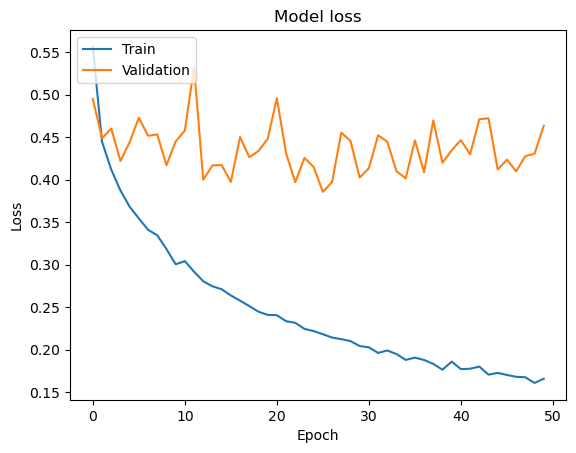

In [43]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
The above graph is plotted between Loss and the number of epochs. We can see that the loss function is getting optimised on the train(blue curve) data.

1/1 [==============================] - 0s 39ms/step
Original label is deer and predicted label is deer


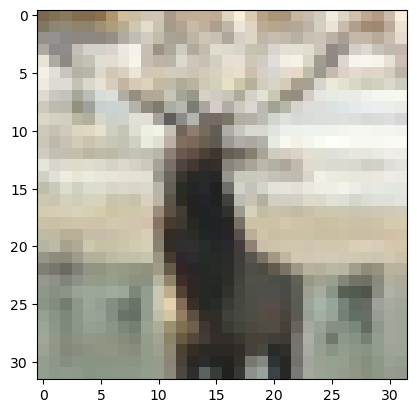

In [26]:
# label mapping

labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

# select the image from our test dataset
image_number = 505

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
arr = np.array(x_test[image_number])

# reshape it
res = arr.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(res).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


In [18]:
# save the model
model.save('image_classification_cifar.h5')


## SVM

In [27]:
# To convert the image into gray-scale
x_train_svm = np.dot(x_train, [0.2989, 0.5870, 0.1140])
x_test_svm = np.dot(x_test, [0.2989, 0.5870, 0.1140])

In [28]:
# To reshape the train and test set of the input features
x_train_svm = x_train_svm.reshape(x_train_svm.shape[0], -1)
x_test_svm = x_test_svm.reshape(x_test_svm.shape[0], -1)

In [29]:
unique_classes = np.unique(y_train)
print(unique_classes)

[0 1 2 3 4 5 6 7 8 9]


In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [32]:
# To Build svm model with rbf kernel
svm_kernel = SVC(kernel='rbf', random_state=45)
svm_kernel.fit(x_train_svm, y_train)

SVC(random_state=45)

In [33]:
# To predict and see the accuracy
y_pred_svm_kernel = svm_kernel.predict(x_test_svm)
accuracy_svm_kernel = accuracy_score(y_test, y_pred_svm_kernel)
confusion_matrix_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel)

In [34]:
# To print the confusion matrix of SVM - rbf kernel
print(confusion_matrix_svm_kernel)

[[420  37 105  22 103  13  53  32 155  60]
 [ 27 541  13  37  21  20  55  32  80 174]
 [ 73  26 329  96 184  57 132  41  44  18]
 [ 49  41  87 278 105 141 141  55  34  69]
 [ 57  28 165  57 414  47 110  52  50  20]
 [ 41  18 102 161  83 379  83  71  27  35]
 [ 38  38  93  65 102  53 526  18  36  31]
 [ 44  27  63  71  98  64  48 466  46  73]
 [ 88  79  27  36  41  21  27  30 591  60]
 [ 31 160  26  35  17  16  38  43  81 553]]


In [35]:
print(accuracy_svm_kernel)

0.4497


In [39]:
# To build the SVM model with polynomial model
svm_kernel = SVC(kernel='poly', random_state=45)
svm_kernel.fit(x_train_svm, y_train)

SVC(kernel='poly', random_state=45)

In [40]:
# To predict for the target and see the accuracy
y_pred_svm_kernel = svm_kernel.predict(x_test_svm)
accuracy_svm_kernel = accuracy_score(y_test, y_pred_svm_kernel)
confusion_matrix_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel)

In [41]:
# To print the confusion matrix
print(confusion_matrix_svm_kernel)

[[460  35  96  34 130  19  31  29 125  41]
 [ 43 540  15  31  41  13  61  23  80 153]
 [ 75  26 347  81 204  76  94  45  36  16]
 [ 44  39 110 293 115 153 134  54  20  38]
 [ 60  23 160  63 451  45 112  41  27  18]
 [ 40  20 139 175  91 335  73  77  24  26]
 [ 37  50 105  84 145  49 465  20  23  22]
 [ 47  39  82  79 114  77  41 451  27  43]
 [126  75  38  33  64  24  24  18 547  51]
 [ 42 191  30  54  35  20  38  47  86 457]]


In [42]:
# Accuracy of the SVM model with poly kernel
print(accuracy_svm_kernel)

0.4346


## Model comparison:
CNN Model:
1. Trained on color images, the CNN model utilized convolutional layers followed by max pooling and dense layers to achieve its results.  
2. The model attained a test set accuracy score of 0.7742, with a loss of 0.6906.
3. Both the training and validation sets produced high accuracy scores, although some slight overfitting was observed.
4. The model converged quickly, achieving low loss values on both the training and validation sets.

SVM Model:
1. The SVM model was trained on grayscale images, utilizing polynomial and RBF kernel functions.
2. The polynomial kernel function produced an accuracy score of 0.4468, whereas the RBF kernel function yielded an accuracy score of 0.4995.
3. The confusion matrix showed that the model had difficulty distinguishing between certain classes, particularly classes 1, 2, and 6.

In conclusion, it appears that the CNN model outperformed the SVM model in terms of accuracy and the ability to distinguish between different classes. Nonetheless, the SVM model had the advantage of being faster to train and may be a better option for smaller datasets.






